## Importing Necessary Libraries

In [3]:
import librosa
import librosa.display as lplt
from IPython.display import Audio 
from scipy.io import wavfile as wav
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Plots_func import plt_mag_spec
from Plots_func import plt_spectogram

In [4]:
jazz      = 'C:\\Users\\Saad\\Desktop\\Project\\MGC\\Data\\genres_original\\jazz\\jazz.00006.wav'
classical = 'C:\\Users\\Saad\\Desktop\\Project\\MGC\\Data\\genres_original\\classical\\classical.00036.wav'

In [5]:
Audio(jazz)

In [7]:
Audio(classical)

In [8]:
jazz, sr = librosa.load(jazz)
classical, sr = librosa.load(classical)

In [9]:
jazz, classical

(array([0.08334351, 0.14605713, 0.14706421, ..., 0.0085144 , 0.00469971,
        0.00369263], dtype=float32),
 array([ 0.00167847,  0.00393677,  0.00320435, ..., -0.00067139,
        -0.00082397, -0.00091553], dtype=float32))

In [10]:
jazz.size

661794

### Sound Wave Plot

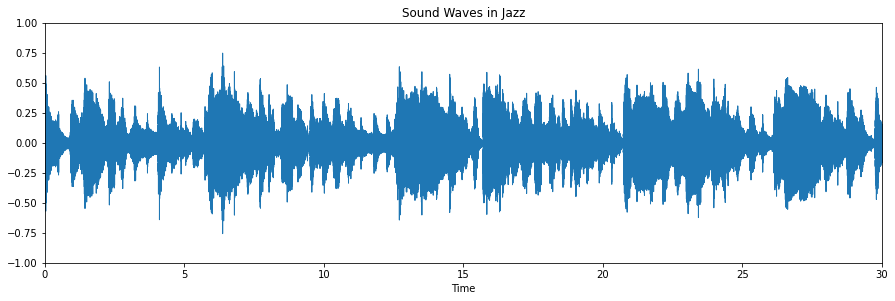

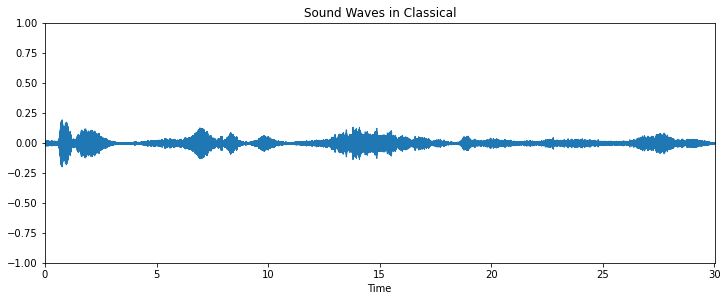

In [11]:
plt.figure(figsize= (15, 15))
plt.subplot(3, 1, 1)
lplt.waveplot(jazz)
plt.title("Sound Waves in Jazz")
plt.ylim((-1, 1))

plt.figure(figsize= (12, 15))
plt.subplot(3, 1, 2)
lplt.waveplot(classical)
plt.title("Sound Waves in Classical")
plt.ylim((-1, 1))
              
plt.show()      

### Fourier Transform

In [12]:
jazz_ft = np.fft.fft(jazz)
classical_ft = np.fft.fft(classical)
print(jazz_ft.shape, classical_ft.shape)

(661794,) (661794,)


In [13]:
jazz_ft[0]

(-10.809997558593764-1.0658141036401503e-14j)

### Plotting Magnitude Spectrum

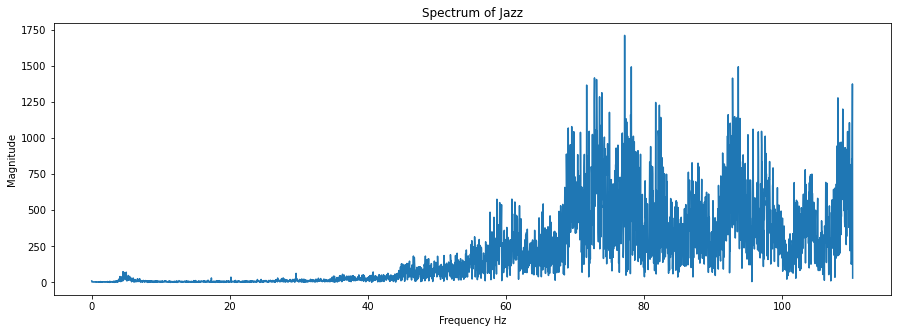

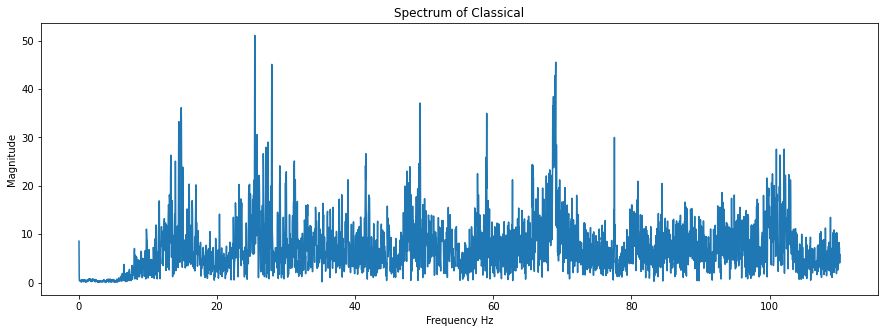

In [14]:
plt_mag_spec(jazz, "Spectrum of Jazz", sr, 0.005)
plt_mag_spec(classical, "Spectrum of Classical", sr, 0.005)

### ShortTime Fourier Transform

In [20]:
hop_length = 512
frame_size = 2048

In [21]:
jazz_scaled = librosa.stft(jazz, n_fft=frame_size, hop_length=hop_length)

In [22]:
classical_scaled = librosa.stft(classical, n_fft=frame_size, hop_length=hop_length)

### Plotting Spectogram

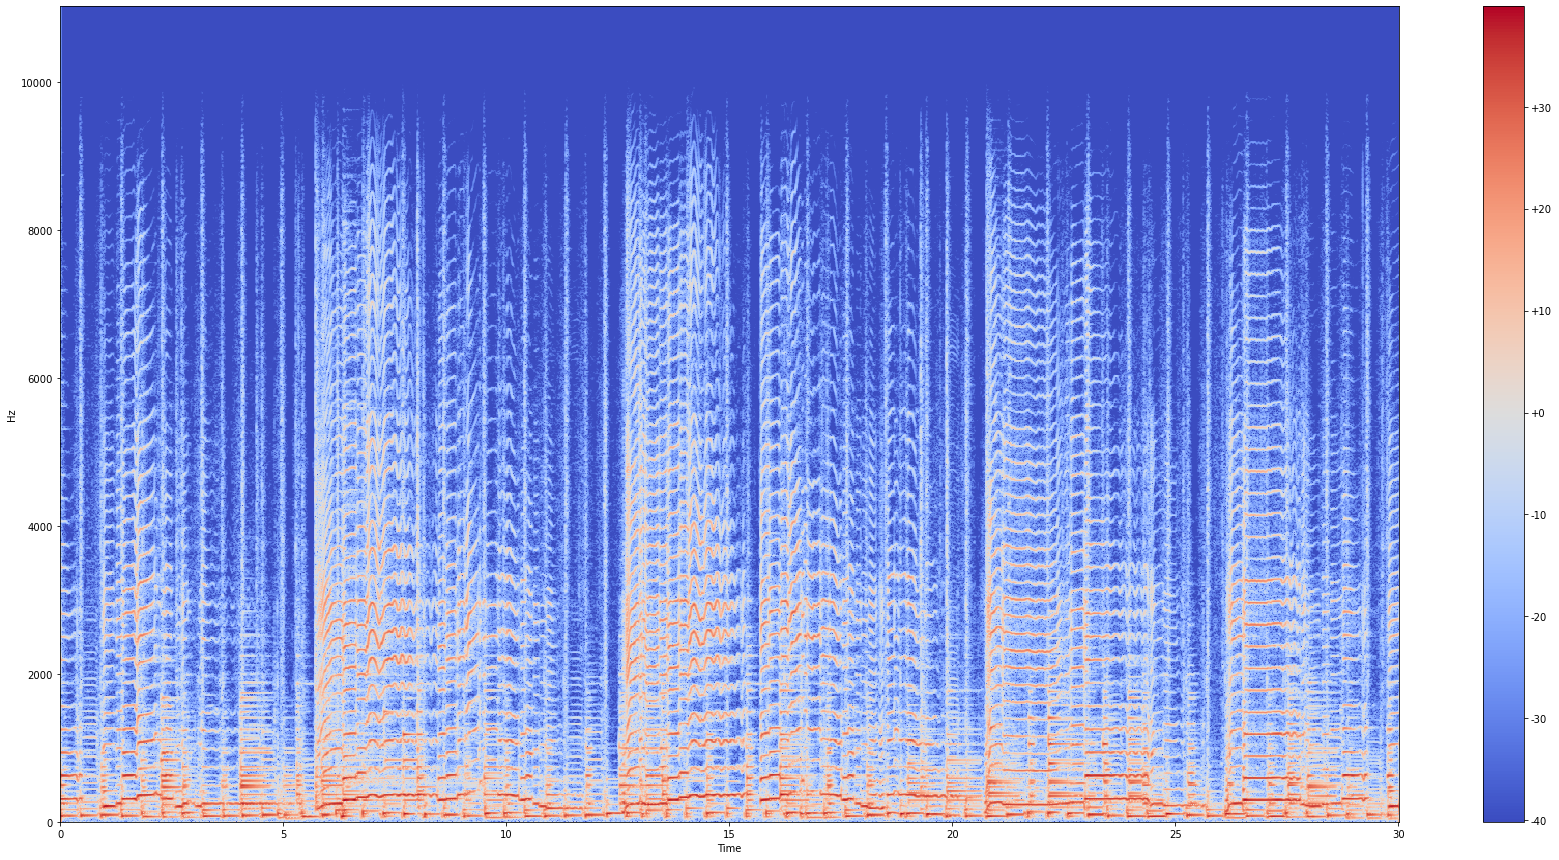

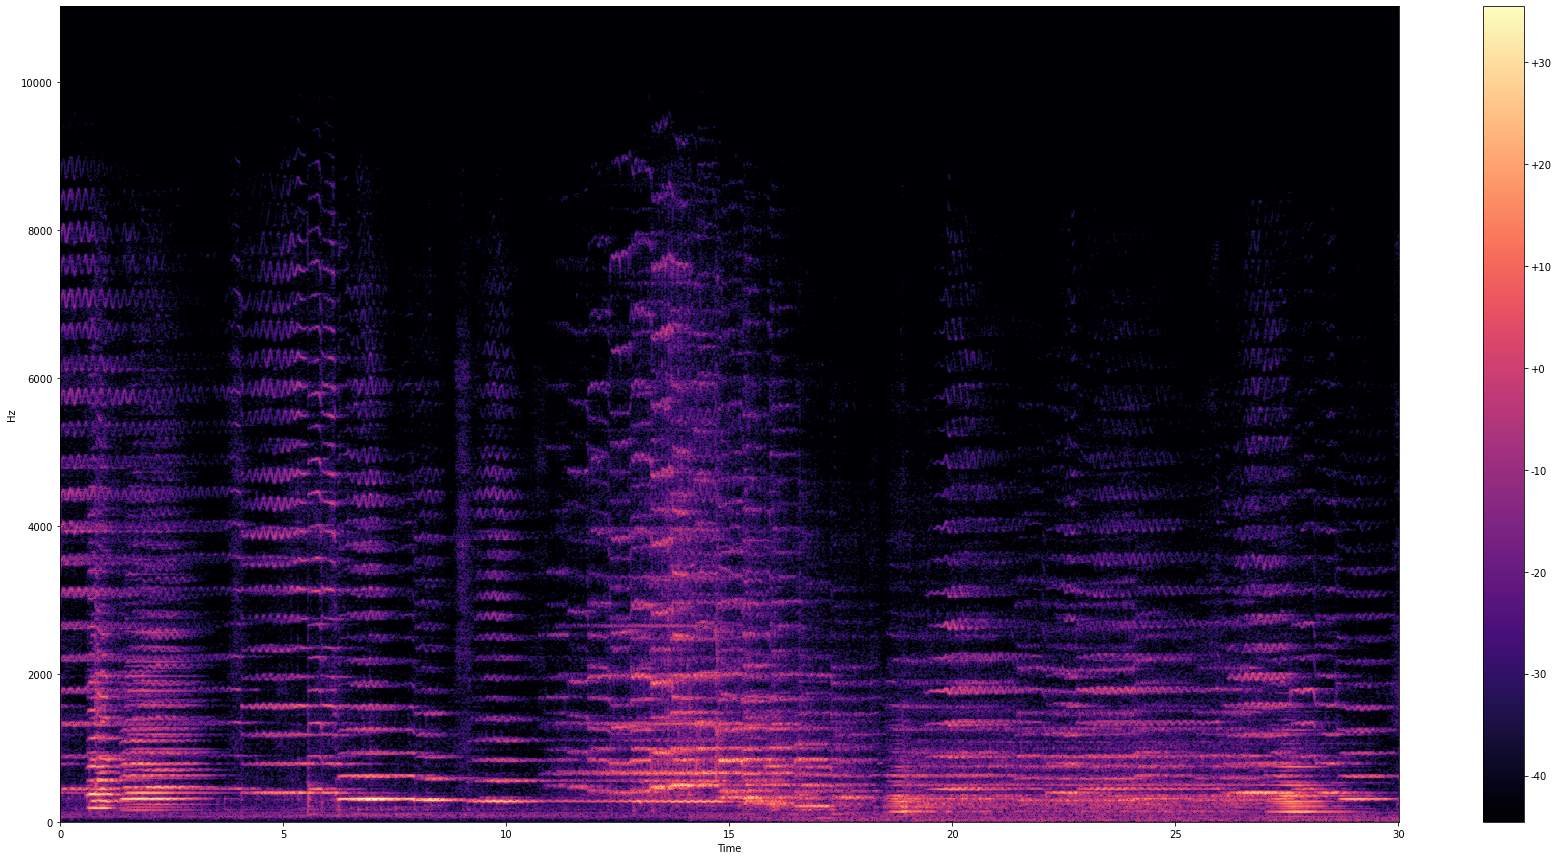

In [23]:
jazz_log = librosa.power_to_db(np.abs(jazz_scaled) ** 2)
plt_spectogram(jazz_log, sr, hop_length, y_axis="linear")

classical_log = librosa.power_to_db(np.abs(classical_scaled) ** 2)
plt_spectogram(classical_log, sr, hop_length, y_axis="linear")

## Mel-Spectograms

In [24]:
mel_spec_jazz      = librosa.feature.melspectrogram(jazz, sr=sr, n_fft=2048, hop_length=512, n_mels=100)
mel_spec_classical = librosa.feature.melspectrogram(classical, sr=sr, n_fft=2048, hop_length=512, n_mels=100)
mel_spec_jazz.shape, mel_spec_classical.shape

((100, 1293), (100, 1293))

In [25]:
log_mel_spec_jazz      = librosa.power_to_db(mel_spec_jazz)
log_mel_spec_classical = librosa.power_to_db(mel_spec_classical)

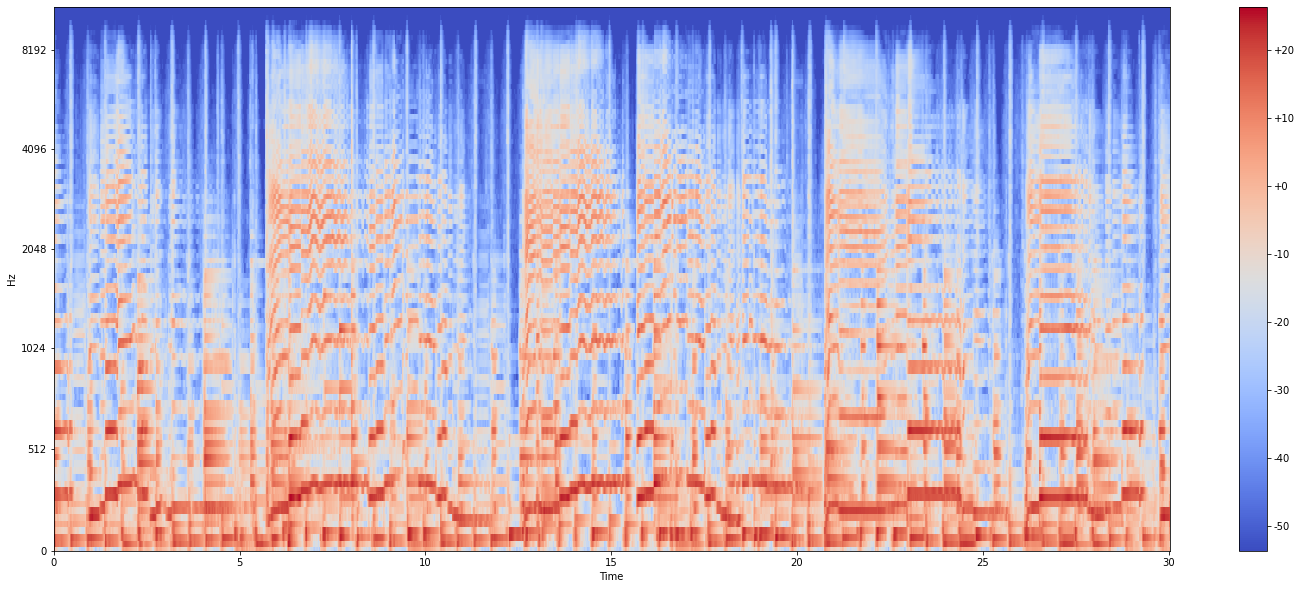

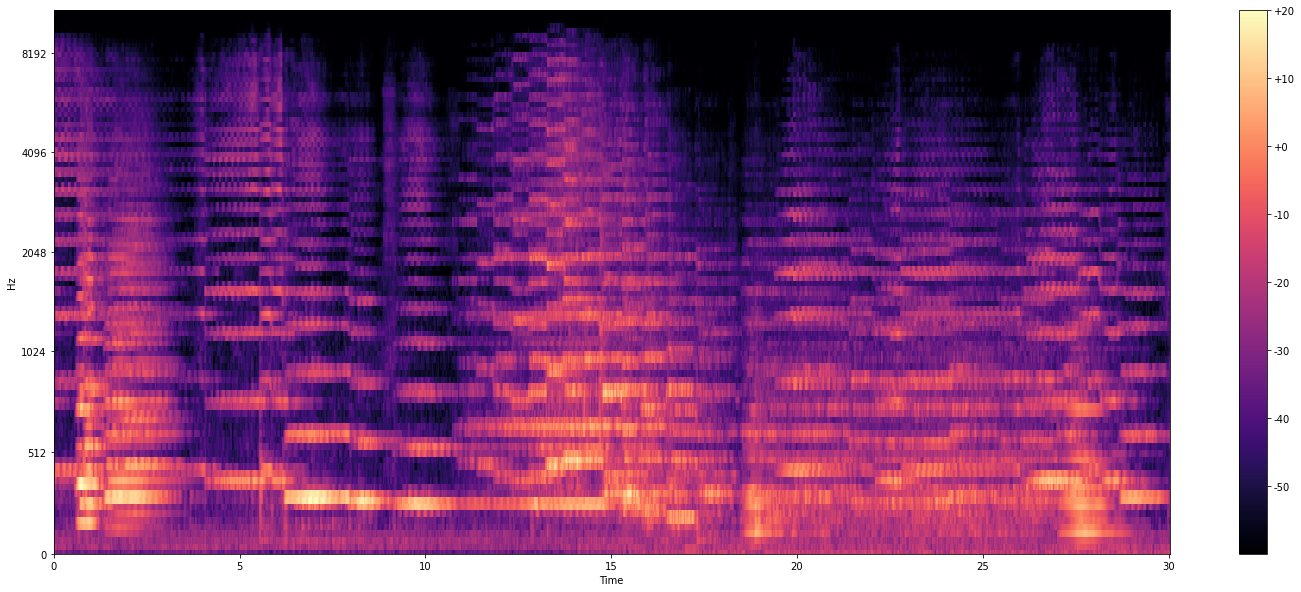

In [26]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spec_jazz, sr=sr, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.f')
plt.show()

plt.figure(figsize=(25, 10))
librosa.display.specshow(log_mel_spec_classical, sr=sr, y_axis='mel', x_axis='time')
plt.colorbar(format='%+2.f')
plt.show()

### MFCCs

In [27]:
jazz_mfcc      = librosa.feature.mfcc(jazz, n_mfcc=13, sr=sr)
classical_mfcc = librosa.feature.mfcc(classical, n_mfcc=13, sr=sr)

jazz_mfcc.shape, classical_mfcc.shape

((13, 1293), (13, 1293))

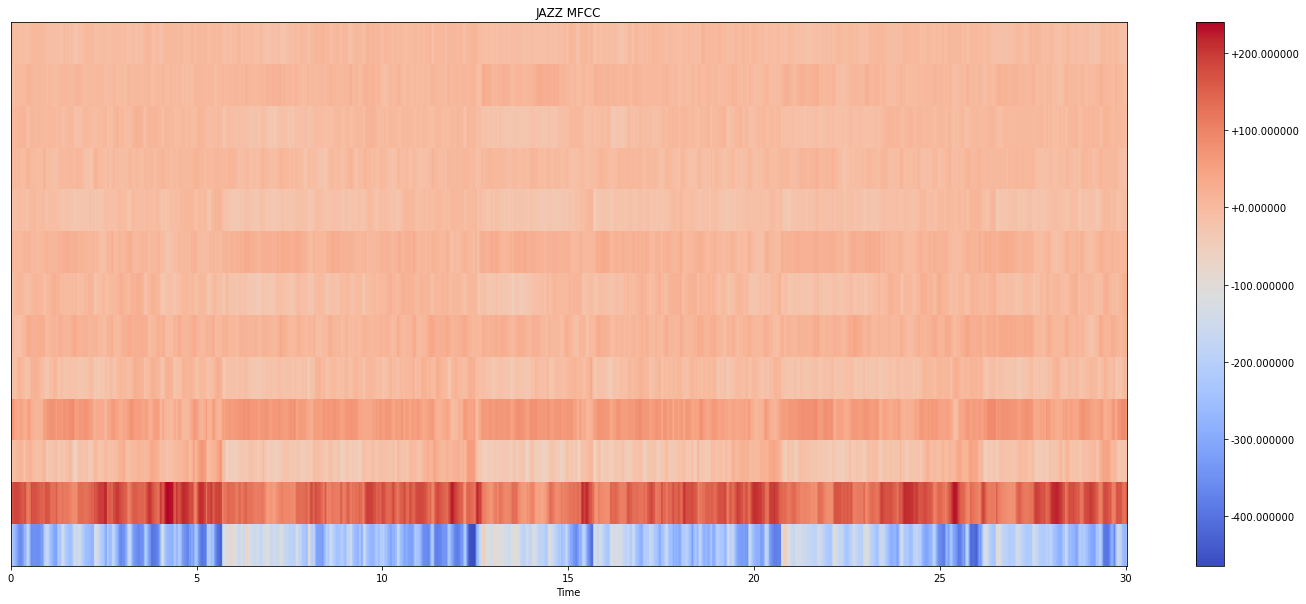

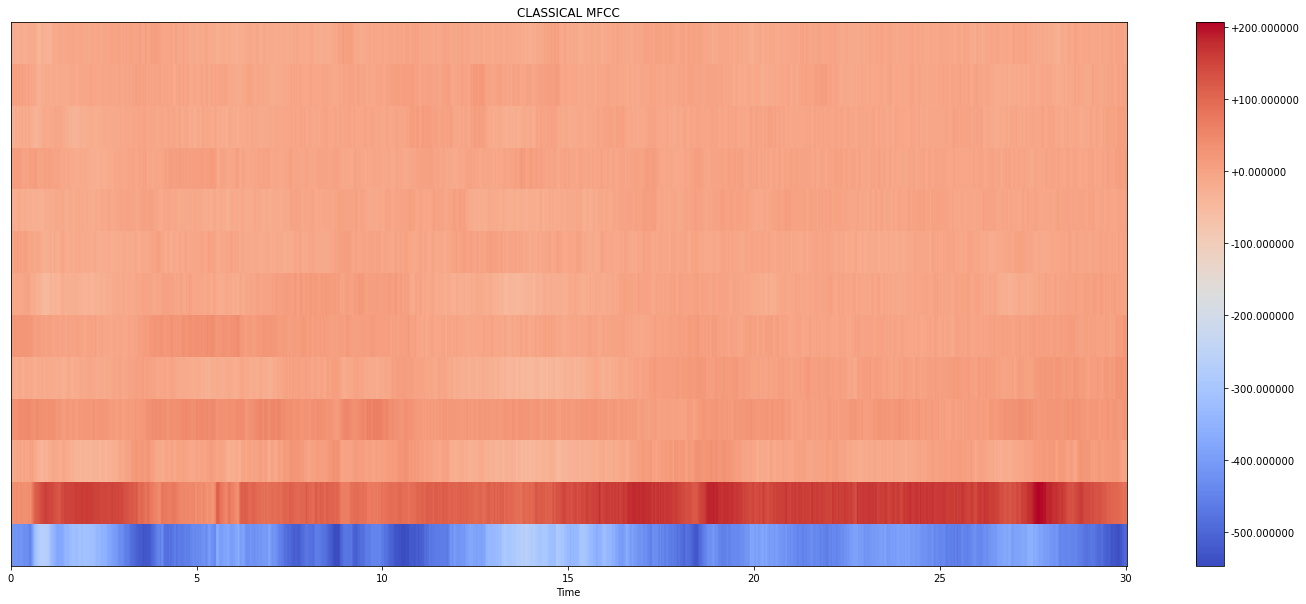

In [28]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(jazz_mfcc, x_axis='time', sr=sr)
plt.colorbar(format='%+2f')
plt.title("JAZZ MFCC")
plt.show()

plt.figure(figsize=(25,10))
librosa.display.specshow(classical_mfcc, x_axis='time', sr=sr)
plt.colorbar(format='%+2f')
plt.title("CLASSICAL MFCC")
plt.show()

## Spectral Centroid

In [29]:
sc_jazz      = librosa.feature.spectral_centroid(jazz, n_fft=frame_size, hop_length=hop_length, sr=sr)[0]
sc_classical = librosa.feature.spectral_centroid(classical, n_fft=frame_size, hop_length=hop_length, sr=sr)[0]
sc_jazz.shape, sc_classical.shape

((1293,), (1293,))

In [30]:
frames = range(len(sc_jazz))
t      = librosa.frames_to_time(frames)

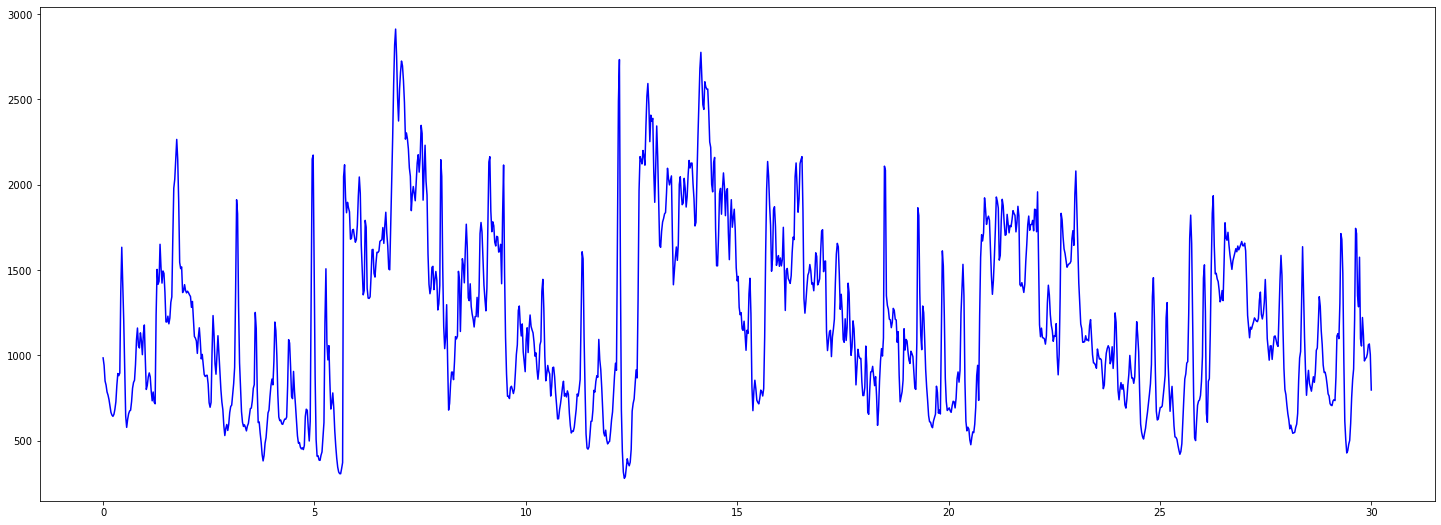

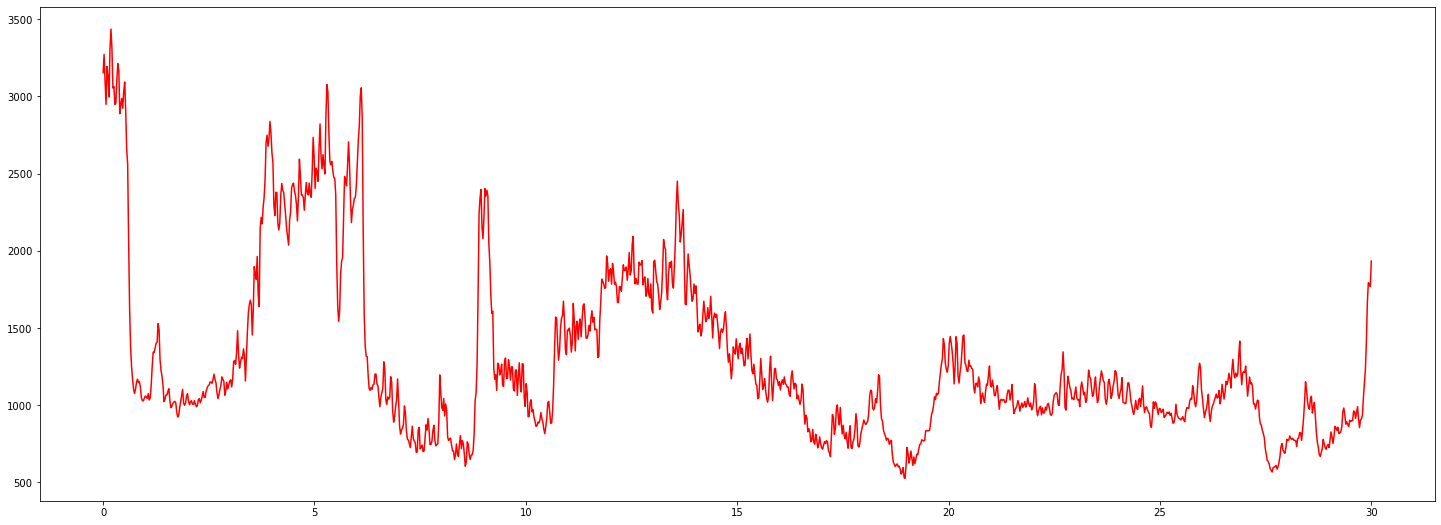

In [31]:
plt.figure(figsize=(25, 20))

ax = plt.subplot(2, 1, 1)
plt.plot(t, sc_jazz, color='b')
plt.show()

plt.figure(figsize=(25, 20))
plt.subplot(2, 1, 2)
plt.plot(t, sc_classical, color='r')
plt.show()

## Root-Mean Squared Energy

In [32]:
rms_jazz      = librosa.feature.rms(jazz, frame_length=1024, hop_length=512)[0]
rms_classical = librosa.feature.rms(classical, frame_length=1024, hop_length=512)[0]

In [33]:
rms_jazz.shape, rms_jazz.shape

((1293,), (1293,))

In [34]:
frames_rms = range(len(rms_jazz))
t_rms      = librosa.frames_to_time(frames_rms, hop_length=512)

Text(0.5, 1.0, 'Classical')

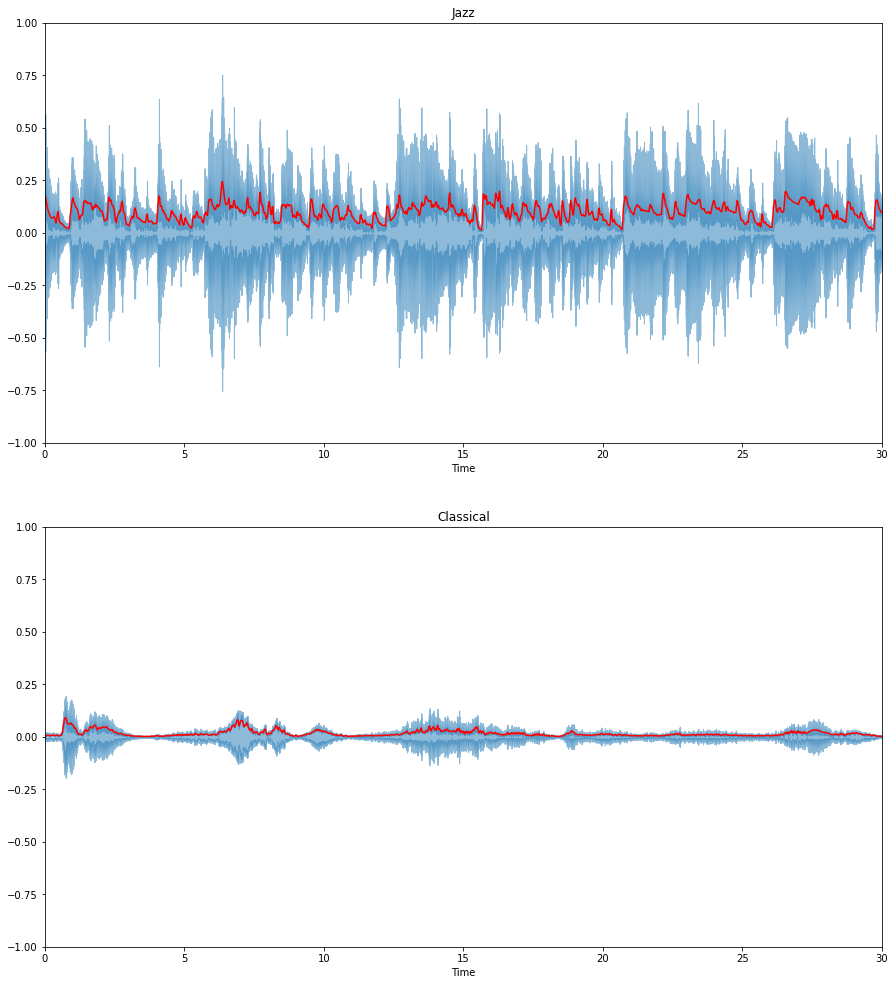

In [35]:
plt.figure(figsize=(15, 17))

ax = plt.subplot(2, 1, 1)
librosa.display.waveplot(jazz, alpha=0.5)
plt.plot(t_rms, rms_jazz, color="r")
plt.ylim(-1, 1)
plt.title("Jazz")

plt.subplot(2, 1, 2)
librosa.display.waveplot(classical, alpha=0.5)
plt.plot(t_rms, rms_classical, color="r")
plt.ylim(-1, 1)
plt.title("Classical")